In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
df = pd.read_json('TopicModelingTexts.json')
df.head()

,Author,Title,Book
0,William Carey,An Enquiry Into The Obligations Of Christians,\r\n\r\n\r\n\r\n\r\n A...
1,Anthony N. Groves,Journal of a Residence at Bagdad,"JOURNAL\r\nOF A\r\nRESIDENCE AT BAGDAD, \r\nDU..."
2,James D. Knowles,Memoir of Mrs. Ann H. Judson,\r\nSdR \r\n\r\n\r\n\r\nm \r\n\r\n\r\n\r\n\r\n...
3,George Müller,A Narrative of Some of the Lord's Dealings Wi...,The Project Gutenberg EBook of A Narrative of ...
4,George Müller,A Narrative of Some of the Lord's Dealings Wi...,The Project Gutenberg EBook of A Narrative of ...


In [3]:
df.describe()

,Author,Title,Book
count,179,179,179
unique,128,178,178
top,Amy Charmichael,"Life of Henry Martyn, Missionary to India and ...",MISSIONARY ANNALS.\r\n\r\n(A SERIES.)\r\n\r\n\...
freq,13,2,2


In [4]:
df.shape

(179, 3)

In [5]:
#Data preprocessing and cleaning
import re
import string

def clean(text):
    text = str(text).lower() #making all text lowercase
    text = re.sub('\[.*?\]', ' ', text) #removing full stops and question marks
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text) #removing digits
    text = re.sub('[''""...]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\\r*\\n*\\\\*', '', text)
    return text
cleaned = lambda x: clean(x)

In [6]:
df['Book'] = pd.DataFrame(df['Book'].apply(cleaned))
df.Book

0                                    an enquiry into ...
1      journal of a residence at bagdad   during the ...
2       sdr     m            cct        memoir     mr...
3      the project gutenberg ebook of a narrative of ...
4      the project gutenberg ebook of a narrative of ...
                             ...                        
174    if i had two lives    the extraordinary life a...
175     chasing revival    a road trip bible study  e...
176    visit tyndalc online at www tyndale com  visit...
177    table of contents  title page  copyright page ...
178    while every precaution has been taken in the p...
Name: Book, Length: 179, dtype: object

In [7]:
#Pickle cleaned data for future use
df.to_pickle('df_book2.pkl')

In [8]:
#Removing stopwords
stop_words = set(stopwords.words('english'))
df['Book'] = df['Book'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

In [9]:
#Word tokenization
t = ' '.join(df['Book'])
word_tokenize = [word for word in nltk.tokenize.word_tokenize(t) if word not in stop_words and len(word) > 3]

In [10]:
#Find most common words used in the documents
freq_words = nltk.FreqDist(t).most_common
freq_words

<bound method Counter.most_common of FreqDist({' ': 7071321, 'e': 5394275, 'a': 3057717, 's': 2999318, 'n': 2996437, 'i': 2977608, 'r': 2960310, 't': 2857042, 'o': 2761791, 'l': 2146363, ...})>

In [11]:
#create a document term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(df.Book)
dtm_data = pd.DataFrame(dtm.toarray(), columns= tfidf.get_feature_names())
dtm_data.index = df.index
dtm_data

,aa,aaa,aaaaahhhhh,aaah,aabye,aad,aafety,aagust,aah,aahed,...,énergique,était,état,été,évangéliques,êtes,është,über,übermensch,œcumenical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#pickle dtm for future use
dtm_data.to_pickle('Mission_dtm22.pkl')

In [13]:
#EDA
dtm_data_pkl = pd.read_pickle('Mission_dtm22.pkl')
dtm_data_pkl = dtm_data_pkl.transpose()
dtm_data_pkl.head()

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003593,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.004629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaahhhhh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aabye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Top 30 worods used by each writer/Book
top_dict = {}
for t in dtm_data_pkl.columns:
    top = dtm_data_pkl[t].sort_values(ascending=False).head(30)
    top_dict[t] = list(zip(top.index, top.values))
    
top_dict

{0: [('ditto', 0.7009554677385785),
  ('pagans', 0.24330685657041567),
  ('mahometans', 0.19934716900813787),
  ('papists', 0.19902093726637848),
  ('compass', 0.12825974194445325),
  ('gospel', 0.10440307729021431),
  ('christians', 0.10186533785503626),
  ('great', 0.07768331604775504),
  ('time', 0.07768331604775504),
  ('god', 0.07578860102220003),
  ('shall', 0.06971654203994582),
  ('apostles', 0.06706707526694015),
  ('protestants', 0.06625814399248509),
  ('lord', 0.06287392875450219),
  ('preached', 0.062458561433374735),
  ('paul', 0.060484385304767324),
  ('negroes', 0.05965385989601554),
  ('work', 0.05873616579220503),
  ('world', 0.05873616579220503),
  ('jews', 0.05862923665737462),
  ('isles', 0.057502073685032275),
  ('heathens', 0.05684037159190934),
  ('christ', 0.05587023202979454),
  ('isle', 0.05569459081953499),
  ('lutherans', 0.05386901457817901),
  ('heathen', 0.05201656976475631),
  ('went', 0.051442305344592695),
  ('success', 0.05037686824146188),
  ('inhab

In [15]:
#Check the top 15 words used by each author/Book
for author, top_words in top_dict.items():
    print(author)
    print(', '.join([word for word, count in top_words[:14]]))
    print('---')

0
ditto, pagans, mahometans, papists, compass, gospel, christians, great, time, god, shall, apostles, protestants, lord
---
1
pasha, lord, plague, god, dear, day, armenian, little, aleppo, shushee, bagdad, love, bussorah, feel
---
2
judson, memoir, mrs, moung, burman, mr, rangoon, god, ava, burmans, ing, day, shwa, burmah
---
3
lord, god, time, gutenberg, craik, brother, bristol, brethren, orphan, work, house, prayer, tm, day
---
4
lord, orphan, today, orphans, gutenberg, day, brother, came, labourers, sent, bristol, god, time, money
---
5
karens, byu, karen, thah, ko, god, boardman, tavoy, burman, maulmain, maubee, grandchildren, burmans, great
---
6
lord, god, orphan, orphans, day, brother, came, gutenberg, today, time, money, need, bristol, brethren
---
7
laing, charlotte, life, children, god, green, jesus, death, miss, little, glory, happy, child, psalm
---
8
god, mccheyne, lord, day, mr, time, christ, sabbath, soul, heart, dundee, people, prayer, larbert
---
9
judson, moung, rango

In [16]:
#Look at the most common top words and add it to the list of stop words
#Pull out the top words for each author
from collections import Counter

words = []
for author in dtm_data_pkl.columns:
    top = [word for (word, count) in top_dict[author]]
    for t in top:
        words.append(t)
        
words

['ditto',
 'pagans',
 'mahometans',
 'papists',
 'compass',
 'gospel',
 'christians',
 'great',
 'time',
 'god',
 'shall',
 'apostles',
 'protestants',
 'lord',
 'preached',
 'paul',
 'negroes',
 'work',
 'world',
 'jews',
 'isles',
 'heathens',
 'christ',
 'isle',
 'lutherans',
 'heathen',
 'went',
 'success',
 'inhabitants',
 'barbarous',
 'pasha',
 'lord',
 'plague',
 'god',
 'dear',
 'day',
 'armenian',
 'little',
 'aleppo',
 'shushee',
 'bagdad',
 'love',
 'bussorah',
 'feel',
 'tabreez',
 'city',
 'mr',
 'come',
 'mosul',
 'ali',
 'pfander',
 'moolah',
 'shall',
 'know',
 'great',
 'heart',
 'soul',
 'time',
 'daoud',
 'merdin',
 'judson',
 'memoir',
 'mrs',
 'moung',
 'burman',
 'mr',
 'rangoon',
 'god',
 'ava',
 'burmans',
 'ing',
 'day',
 'shwa',
 'burmah',
 'religion',
 'op',
 'ed',
 'little',
 'time',
 'mission',
 'house',
 'great',
 'christ',
 'shall',
 'life',
 'calcutta',
 'maulmein',
 'bengal',
 'make',
 'tion',
 'lord',
 'god',
 'time',
 'gutenberg',
 'craik',
 'brother

In [17]:
#Aggregate the list and identify most common words along each article
Counter(words).most_common

<bound method Counter.most_common of Counter({'god': 157, 'time': 152, 'day': 120, 'people': 84, 'life': 83, 'said': 82, 'lord': 78, 'work': 78, 'man': 77, 'came': 74, 'great': 70, 'little': 59, 'years': 56, 'church': 54, 'like': 53, 'come': 52, 'mr': 51, 'men': 50, 'christ': 43, 'jesus': 40, 'way': 39, 'home': 37, 'chinese': 35, 'china': 35, 'know': 34, 'prayer': 33, 'new': 31, 'missionary': 29, 'christian': 25, 'went': 24, 'house': 24, 'children': 24, 'mission': 23, 'world': 22, 'didn': 22, 'spirit': 21, 'heart': 18, 'mrs': 18, 'faith': 18, 'gospel': 17, 'shall': 17, 'told': 17, 'love': 16, 'ing': 16, 'good': 15, 'india': 15, 'bible': 15, 'christians': 14, 'money': 14, 'village': 14, 'long': 14, 'father': 14, 'things': 14, 'don': 14, 'dr': 13, 'school': 13, 'old': 13, 'women': 13, 'city': 12, 'word': 12, 'child': 12, 'mother': 12, 'missionaries': 12, 'days': 12, 'bristol': 11, 'asked': 11, 'dear': 10, 'burman': 10, 'brother': 10, 'orphan': 10, 'today': 10, 'karen': 10, 'knew': 10, 'r

In [18]:
new_stop_words = [word for word, count in Counter(words).most_common() if count > 89]
new_stop_words

['god', 'time', 'day']

In [19]:
from sklearn.feature_extraction import text

stop_words1 = text.ENGLISH_STOP_WORDS.union(new_stop_words)

In [20]:
#Recreate the document term matrix
tfidf2 = TfidfVectorizer(stop_words=stop_words1)
dtm = tfidf2.fit_transform(df.Book)
dtm_stop = pd.DataFrame(dtm.toarray(), columns=tfidf2.get_feature_names())
dtm_stop_index = df.index

In [21]:
#pickle the dtm for future use
import pickle
pickle.dump(tfidf2, open('dtm_stop22', 'wb'))
dtm_stop.to_pickle('dtm_stop22.pkl')

In [22]:
#Create wordclouds for each author
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150)
plt.rcParams['figure.figsize'] = [16, 6]
authors = df['Author']

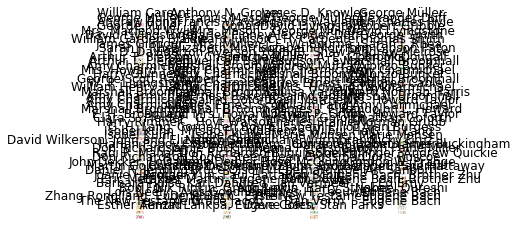

In [23]:
#create subplots for each author

for index, author in enumerate(dtm_data_pkl.columns):
    wc.generate(df.Book[author])
    
    plt.subplot(50, 4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(authors[index])
    plt.savefig('Wc_missionary_trends22.png')
    
plt.show() 

In [25]:
#Find the number of unique words used by each author
unique_list = []
for author in dtm_data_pkl.columns:
    uniques = dtm_data_pkl[author].nonzero()[0].size
    unique_list.append(uniques)
    
#create a new dataframe that contains the uique word count
data_words = pd.DataFrame(list(zip(authors, unique_list, df.Title)), columns=['Author', 'unique_words', 'Title'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


,Author,unique_words,Title
158,Jan Vermeer,1030,How One Woman Truly Got to Know Jesus in a Nor...
99,Jonathan Goforth,1333,When the Spirit's Fire Swept Korea
157,Karl Dahlfred,1432,Daniel McGilvary Pioneer Missionary to Norther...
55,Amy Charmichael,1536,The Beginning Of A Story
109,Mitsuo Fuchida,1925,From Pearl Harbor To Calvary
...,...,...,...
25,Edward Judson,13884,The Life of Adoniram Judson
23,George Smith,14187,The Life of Alexander Duff
152,Eric Metaxas,14286,"Bonhoeffer Pastor, Martyr, Prophet, Spy"
34,Elizabeth Morrison,14699,Memoirs of the Life and Labours of Robert Morr...


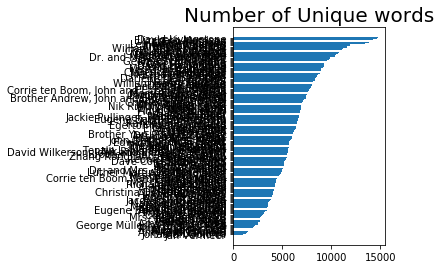

In [27]:
#plot unique words
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Author)
plt.title('Number of Unique words', fontsize= 20)
plt.savefig('Unique_words_mission_texts22.png')
plt.show()

In [28]:
#Carry out sentiment analysis
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['Book'].apply(pol)
df['subjectivity'] = df['Book'].apply(sub)
df

,Author,Title,Book,polarity,subjectivity
0,William Carey,An Enquiry Into The Obligations Of Christians,enquiry obligations christians use means conve...,0.153658,0.453096
1,Anthony N. Groves,Journal of a Residence at Bagdad,journal residence bagdad years mr anthony n gr...,0.105683,0.480833
2,James D. Knowles,Memoir of Mrs. Ann H. Judson,sdr cct memoir mrs ann h jujdson late missiona...,0.105206,0.444962
3,George Müller,A Narrative of Some of the Lord's Dealings Wi...,project gutenberg ebook narrative lord dealing...,0.120982,0.433553
4,George Müller,A Narrative of Some of the Lord's Dealings Wi...,project gutenberg ebook narrative lord dealing...,0.111361,0.431443
...,...,...,...,...,...
174,Dan Vorm,If I Had Two Lives The Extraordinary Life and ...,two lives extraordinary life faith costas macr...,0.138497,0.452013
175,Eugene Bach,Chasing Revival,chasing revival road trip bible study eugene b...,0.092193,0.440110
176,Esther Ahmad,Defying Jihad,visit tyndalc online www tyndale com visit tym...,0.095978,0.465088
177,"Tenzin Lahkpa, Eugene Bach",Leaving Buddha,table contents title page copyright page note ...,0.079465,0.454054


In [29]:
#As expected all sentiments are positive

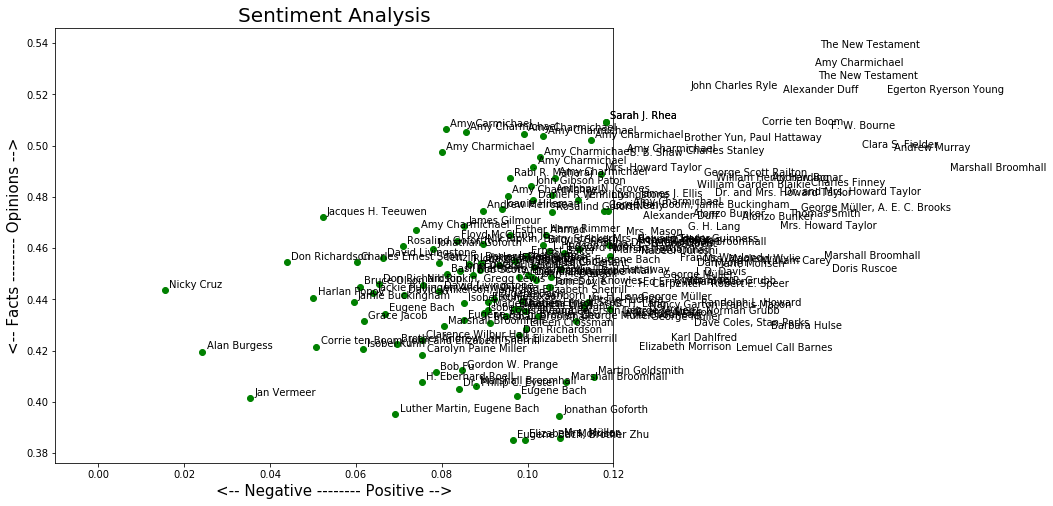

In [30]:
#plottitng the results
plt.rcParams['figure.figsize'] = [10, 8]
for index, author in enumerate(df.index):
    x = df.polarity.loc[author]
    y = df.subjectivity.loc[author]
    plt.scatter(x, y, color = 'green')
    plt.text(x+.001, y+.001, df['Author'][index], fontsize = 10)
    plt.xlim(-.01, .12)
    
plt.title('Sentiment Analysis', fontsize= 20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize = 15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize = 15)
plt.savefig('Sentiment_analysis_mission_text22.png')
plt.show()